In [74]:
#!pip install ipywidgets
#!pip install plotly

In [75]:
import json
import pandas as pd
import numpy as np
import os
import csv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go

from ipywidgets import interact, widgets, fixed, FloatSlider
from collections import defaultdict

In [30]:
with open("../DataProcessing/TestData/gameData.json", "r", encoding="utf-8") as file:
    data = json.load(file)
    
with open("../DataProcessing/TestData/postGame.json", "r", encoding="utf-8") as file:
    postData = json.load(file)
    
with open("../DataProcessing/TestData/runeSheet.json", "r", encoding="utf-8") as file:
    runeSheet = json.load(file)
    
participantsData = data['metadata']['participants']
framesData = data['info']['frames']
participantFrames = [frame['participantFrames'] for frame in framesData]

championCountsDict = defaultdict(lambda: defaultdict(int))
namesDict = defaultdict(list)

mostMentionedNamesDict = {}
participantData = []
participantChampionMapping = {}

blueTimestamps = {}
redTimestamps = {}

gameStartTimestamp = postData['info']['gameStartTimestamp']
gameEndTimestamp = postData['info']['gameEndTimestamp']
gameDurationMs = gameEndTimestamp - gameStartTimestamp
gameDurationMinutes = gameDurationMs / 60000

In [31]:
#1,'9nFTht795izeoOQoIQMOHtY01trPiRW8SC7kUFIqsDJtTEeNUbpxbRriCUtJ3sApIbpwIBNV44mFjg' - Top
#2,'7hSyI8OKEFPpadVyhqKmTOJlT6umda2FMt1sAeIcZ1WcxdATw7Tvu4ixaR8llqv9u2qPutnAsL9Shg' - Jungle
#3,'OosGFQGfn836eMPWWHKI4078RDJNVjtEN5rDdfGWkVKE9WQt57XOtBX7dJbKA2gCjvT2B2oKSOPvQA' - Mid
#4,'GDyaku8KMFbw6-NeobFdpBjk0cH7HeEwcO1O6lJDWx5DlKXBJACwQboLx_8YpwIKIjQajzWtoYjFlQ' - Bot
#5,'YXHmDXvWI5gKk7U3akJzmYR7-SUqINElADzyjLGaKOQ3uo114kFt0bgb9jfrbFyGv3wJY-fss-iGCA' - Support
#6,'a8PtUmwWlbJrEzU-nfibnfFXKmsStyk87eyureQ-juwhCH8cT9V7PIro5PogLxdME0DzYgHuuyl-Fg' - Top
#7,'735uoGC0wWXxRrYW7td31v_tqqAJkVJ3WIwoDAMnOCVvVL6gTw84KV5LFOQpwFkBdPGOQATvkx6ZHw' - Jungle
#8,'eVreMXaliubuCZDOSDs-HnMy3YSPNa3BoCKTUDDQBx3uotw36LQHmhYoJNWBxy5v0U5Wt_jV0yR80A' - Mid
#9,'esX_22maBbJu3Sf7pHod9r65uxnslhai-EnVbgIGjdC4XhW3_5Pocq561XKKt80bZlP5CPvJ3kCoow' - Bot
#10,'pnMNfdDjM97Gr0Qh67jTzEEfLefEI8qjsBxmojuIqGp7cpQPWeBBZ6jfv_UUeV3DqvUg06Rk3lphTg' - Support

targetPuuid = '9nFTht795izeoOQoIQMOHtY01trPiRW8SC7kUFIqsDJtTEeNUbpxbRriCUtJ3sApIbpwIBNV44mFjg'
%store targetPuuid

Stored 'targetPuuid' (str)


In [32]:
%run fetchTargetPuuid.ipynb
%run fetchPostGameData.ipynb
%run fetchTurretInfo.ipynb
%run sectionFunctions.ipynb
%run fetchGameData.ipynb

Participant ID: 1, Champion: Jax
Filtered post game data saved.
Cleaned game data has been saved.


In [33]:
getLaneRole(postData, targetPuuid)
getJungleStats(postData, targetPuuid)

getSoloKills(postData, targetPuuid)
getKillParticipation(postData, targetPuuid)
getTakedowns(postData, targetPuuid)
getDeathsByEnemyChamps(postData, targetPuuid)
getKda(postData, targetPuuid)

getTotalDamageDealt(postData, targetPuuid)
getTotalDamageDealtToChampions(postData, targetPuuid)
getTotalDamageTaken(postData, targetPuuid)

getTeamBaronKills(postData, targetPuuid)
getTeamRiftHeraldKills(postData, targetPuuid)
getDragonTakedowns(postData, targetPuuid)
getTeamElderDragonKills(postData, targetPuuid)
getTurretTakedowns(postData, targetPuuid)

getVisionScore(postData, targetPuuid)
getVisionScoreAdvantageLaneOpponent(postData, targetPuuid)

getWardsPlaced(postData, targetPuuid)
getStealthWardsPlaced(postData, targetPuuid)
getControlWardsPlaced(postData, targetPuuid)
getWardsKilled(postData, targetPuuid)

getGoldPerMinute(postData,targetPuuid)
getLaneMinionsFirst10Minutes(postData, targetPuuid)

getTeamSide(postData, targetPuuid)
getGameWon(postData, targetPuuid)

Role of Jax: TOP
  Solo Kills for Jax: 3
  Kill Participation for Jax: 0.42
  Takedowns by Jax: 21
  Deaths by Enemy Champions on Jax: 9
  KDA by Jax: 2.3333333333333335

  Total Damage Dealt by Jax: 210367
  Total Damage Dealt To Champions by Jax: 28986
  Total Damage Taken for Jax: 41089

  Team Baron Kills by Jax: 1
  Team Elder Dragon Kills by Jax: 1
  Turret Takedowns by Jax: 5

  Vison Score for Jax: 18
  Vision Score Advantage for Jax: -0.3503682613372803
  Wards Placed by Jax: 7
  Stealth Wards Placed by Jax: 7
  Wards Killed by Jax: 4

  Gold Per Minute for Jax: 454.0979780906803
  Lane Minions First 10 Minutes by Jax: 58

Jax was Blue Side
Jaxs Team Won the Game


In [34]:
def getEventsInMinute(data, targetMinute):
    eventsInMinute = []
    if 'info' in data and 'frames' in data['info']:
        for frame in data['info']['frames']:
            timestamp = frame['timestamp']
            currentMinute = round(timestamp / 60000, 2)  # Round to two decimal places
            if currentMinute == targetMinute:
                eventsInMinute.extend(frame.get('events', []))
    return eventsInMinute

In [35]:
def getTowerDestroyedData(data, participantData):
    towerData = []
    caseBlue = 0
    caseRed = 0

    # Initialize boolean variables for blue team
    bto = bti = bmo = bmi = bbo = bbi = True

    # Initialize boolean variables for red team
    rto = rti = rmo = rmi = rbo = rbi = True
    
    for frame in data['info']['frames']:
        for event in frame.get('events', []):
            if event['type'] == 'BUILDING_KILL':
                teamId = event['teamId']
                towerType = event.get('towerType', None)
                laneType = event['laneType']
                timestamp = event['timestamp']
                
                # Update boolean variables based on tower destruction events
                if towerType in ['OUTER_TURRET', 'INNER_TURRET']:
                    if teamId == 100:
                        if towerType == 'OUTER_TURRET':
                            if laneType == 'TOP_LANE':
                                bto = False  # blue top outer destroyed
                            elif laneType == 'MID_LANE':
                                bmo = False  # blue mid outer destroyed
                            elif laneType == 'BOT_LANE':
                                bbo = False  # blue bot outer destroyed
                        elif towerType == 'INNER_TURRET':
                            if laneType == 'TOP_LANE':
                                bti = False  # blue top inner destroyed
                            elif laneType == 'MID_LANE':
                                bmi = False  # blue mid inner destroyed
                            elif laneType == 'BOT_LANE':
                                bbi = False  # blue bot inner destroyed
                        # Call blueDefCaseCalc with updated boolean variables
                        caseBlue = blueDefCaseCalc(bto, bti, bmo, bmi, bbo, bbi)
                        # Update blue team timestamps
                        updateBlueTowerData(caseBlue, timestamp)
                    elif teamId == 200:
                        if towerType == 'OUTER_TURRET':
                            if laneType == 'TOP_LANE':
                                rto = False  # red top outer destroyed
                            elif laneType == 'MID_LANE':
                                rmo = False  # red mid outer destroyed
                            elif laneType == 'BOT_LANE':
                                rbo = False  # red bot outer destroyed
                        elif towerType == 'INNER_TURRET':
                            if laneType == 'TOP_LANE':
                                rti = False  # red top inner destroyed
                            elif laneType == 'MID_LANE':
                                rmi = False  # red mid inner destroyed
                            elif laneType == 'BOT_LANE':
                                rbi = False  # red bot inner destroyed
                        # Call redDefCaseCalc with updated boolean variables
                        caseRed = redDefCaseCalc(rto, rti, rmo, rmi, rbo, rbi)
                        # Update red team timestamps
                        updateRedTowerData(caseRed, timestamp)

                # Append tower data to the list
                towerData.append({
                    'teamId': teamId,
                    'towerType': towerType,
                    'laneType': laneType,
                    'timestamp': timestamp
                })

    return towerData

# Example usage:
towerData = getTowerDestroyedData(data, participantData)

# Display the extracted data
for tower in towerData:
    teamId = tower['teamId']
    towerType = tower['towerType']
    laneType = tower['laneType']
    timestamp = tower['timestamp']

    if towerType in ['OUTER_TURRET', 'INNER_TURRET']:
        print(f"Team: {teamId}, Tower Type: {towerType}, Lane: {laneType}, timestamp {timestamp}")
        
print("\nBlue Team Timestamps:")
for caseNumber, timestamp in blueTimestamps.items():
    print(f"Case Number: {caseNumber}, Timestamp: {timestamp}")

# Print contents of redTimestamps dictionary
print("\nRed Team Timestamps:")
for caseNumber, timestamp in redTimestamps.items():
    print(f"Case Number: {caseNumber}, Timestamp: {timestamp}")

Team: 200, Tower Type: OUTER_TURRET, Lane: MID_LANE, timestamp 1040566
Team: 100, Tower Type: OUTER_TURRET, Lane: BOT_LANE, timestamp 1202540
Team: 200, Tower Type: OUTER_TURRET, Lane: TOP_LANE, timestamp 1221698
Team: 100, Tower Type: OUTER_TURRET, Lane: MID_LANE, timestamp 1254851
Team: 200, Tower Type: INNER_TURRET, Lane: TOP_LANE, timestamp 1261413
Team: 200, Tower Type: OUTER_TURRET, Lane: BOT_LANE, timestamp 1496800
Team: 200, Tower Type: INNER_TURRET, Lane: MID_LANE, timestamp 1717741
Team: 100, Tower Type: OUTER_TURRET, Lane: TOP_LANE, timestamp 1763842
Team: 100, Tower Type: INNER_TURRET, Lane: TOP_LANE, timestamp 1793760
Team: 200, Tower Type: INNER_TURRET, Lane: BOT_LANE, timestamp 2240232

Blue Team Timestamps:
Case Number: 7, Timestamp: 1202540
Case Number: 9, Timestamp: 1254851
Case Number: 12, Timestamp: 1763842
Case Number: 20, Timestamp: 1793760

Red Team Timestamps:
Case Number: 4, Timestamp: 1040566
Case Number: 10, Timestamp: 1221698
Case Number: 17, Timestamp: 1261

In [36]:
def findClosestCaseNumber(blueTimestamps, redTimestamps, participantId, eventTimestamp):
    # Determine which timestamps dictionary to use based on participantId
    timestamps = blueTimestamps if participantId > 0 and participantId < 6 else redTimestamps
    
    closestCaseNumber = None
    smallestDifference = float('inf')
    
    for caseNumber, timestamp in timestamps.items():
        difference = abs(timestamp - eventTimestamp)
        if difference < smallestDifference:
            smallestDifference = difference
            closestCaseNumber = caseNumber
    
    return closestCaseNumber

In [37]:
def executeClosestCaseFunction(blueTimestamps, redTimestamps, participantId, eventTimestamp, x, y):
    # Use the modified findClosestCaseNumber function
    closestCaseNumber = findClosestCaseNumber(blueTimestamps, redTimestamps, participantId, eventTimestamp)
    
    # Determine the function name prefix based on participantId
    functionPrefix = "blueCase" if participantId > 0 and participantId < 6 else "redCase"
    
    # Construct the function name
    functionName = f"{functionPrefix}{closestCaseNumber}"
    
    # Retrieve the function object using globals() or locals() if the function is defined in a local scope
    functionToCall = globals().get(functionName)
    
    # Check if the function exists
    if functionToCall:
        # Print the name of the function being called
        print(f"Calling function: {functionName}")
        
        # Call the function with x and y, and return its result
        return functionToCall(x, y)
    else:
        return "Function does not exist."

In [38]:
def getDeathsForParticipant(data, targetParticipantId, participantData, blue_timestamps, red_timestamps):
    deathData = []

    if 'info' in data and 'frames' in data['info']:
        for frame in data['info']['frames']:
            for event in frame.get('events', []):
                if event['type'] == 'CHAMPION_KILL':
                    victimId = int(event.get('victimId'))
                    if victimId == targetParticipantId:
                        timestamp = round(event['timestamp'] / 60000, 2)  # Convert timestamp to minutes for consistency
                        
                        x = event.get('position', {}).get('x', 0)
                        y = event.get('position', {}).get('y', 0)

                        # Determine safety status at the time of death
                        safetyStatus = executeClosestCaseFunction(
                            blue_timestamps, red_timestamps, targetParticipantId, event['timestamp'], x, y
                        )

                        killerId = int(event.get('killerId'))
                        killerName = next((participant[2] for participant in participantData if participant[0] == killerId),
                                          f"Unknown Champion with ID {killerId}")
                        victimName = next((participant[2] for participant in participantData if participant[0] == targetParticipantId),
                                          f"Unknown Champion with ID {targetParticipantId}")

                        deathData.append({
                            'timestamp': timestamp,
                            'victimId': targetParticipantId,
                            'victimName': victimName,
                            'killerId': killerId,
                            'killerName': killerName,
                            'position': {'x': x, 'y': y},
                            'type': 'CHAMPION_KILL',
                            'safetyStatus': safetyStatus  # Include safety status in the death data
                        })
    return deathData

In [39]:
def writeDeathDataToCSV(deathData, headers=None):
    # Hardcoded file path
    filePath = '../DataProcessing/TestData/participant_deathdata.csv'

    # Default headers if not provided
    if headers is None:
        headers = ['timestamp', 'victimId', 'victimName', 'killerId', 'killerName', 'positionX', 'positionY', 'type', 'safetyStatus']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(filePath), exist_ok=True)

    # Write data to the CSV file
    with open(filePath, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        for death in deathData:
            # Flatten the position data for CSV
            death['positionX'] = death['position']['x']
            death['positionY'] = death['position']['y']
            del death['position']  # Adjust if necessary for your data structure
            writer.writerow(death)

    print(f"Data has been written to '{filePath}'.")
deathDataForParticipant = getDeathsForParticipant(data, targetParticipantId, participantData, blueTimestamps, redTimestamps)
writeDeathDataToCSV(deathDataForParticipant)

Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase9
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Data has been written to '../DataProcessing/TestData/participant_deathdata.csv'.


In [40]:
def getAssistsForParticipant(data, targetParticipantId, participantData, blue_timestamps, red_timestamps):
    assistData = []

    if 'info' in data and 'frames' in data['info']:
        for frame in data['info']['frames']:
            for event in frame.get('events', []):
                if event['type'] == 'CHAMPION_KILL':
                    killerId = int(event.get('killerId'))
                    assistIds = [int(assistId) for assistId in event.get('assistingParticipantIds', [])]

                    if targetParticipantId in assistIds:
                        timestamp = round(event['timestamp'] / 60000, 2)
                        x = event.get('position', {}).get('x', 0)
                        y = event.get('position', {}).get('y', 0)

                        # Determine safety status at the time of the assist
                        safetyStatus = executeClosestCaseFunction(
                            blueTimestamps, redTimestamps, targetParticipantId, event['timestamp'], x, y
                        )

                        killerName = next((participant[2] for participant in participantData if participant[0] == killerId),
                                          f"Unknown Champion with ID {killerId}")

                        assistData.append({
                            'timestamp': timestamp,
                            'killerId': killerId,
                            'killerName': killerName,
                            'assistId': targetParticipantId,
                            'assistName': next((participant[2] for participant in participantData if participant[0] == targetParticipantId),
                                               f"Unknown Champion with ID {targetParticipantId}"),
                            'position': {'x': x, 'y': y},
                            'type': 'CHAMPION_KILL',
                            'safetyStatus': safetyStatus
                        })
    return assistData


In [41]:
def writeAssistDataToCSV(assistData, headers=None):
    # Hardcoded file path
    filePath = '../DataProcessing/TestData/participant_assistdata.csv'

    # Default headers if not provided
    if headers is None:
        headers = ['timestamp', 'killerId', 'killerName', 'assistId', 'assistName', 'positionX', 'positionY', 'type', 'safetyStatus']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(filePath), exist_ok=True)

    # Write data to the CSV file
    with open(filePath, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        for assist in assistData:
            # Flatten the position data for CSV
            assist['positionX'] = assist['position']['x']
            assist['positionY'] = assist['position']['y']
            del assist['position']  # Adjust if necessary for your data structure
            writer.writerow(assist)

    print(f"Data has been written to '{filePath}'.")

assistDataForParticipant = getAssistsForParticipant(data, targetParticipantId, participantData, blueTimestamps, redTimestamps)
writeAssistDataToCSV(assistDataForParticipant)

Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase9
Danger , threat = 100
Calling function: blueCase9
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Data has been written to '../DataProcessing/TestData/participant_assistdata.csv'.


In [42]:
def getKillDataForParticipant(data, participantId, participantData, blueTimestamps, redTimestamps):
    killData = []

    if 'info' in data and 'frames' in data['info']:
        for frame in data['info']['frames']:
            for event in frame.get('events', []):
                if event['type'] == 'CHAMPION_KILL':
                    killerId = int(event.get('killerId'))
                    victimId = int(event.get('victimId'))

                    if killerId == participantId:
                        timestamp = round(event['timestamp'] / 60000, 2)
                        x = event.get('position', {}).get('x', 0)
                        y = event.get('position', {}).get('y', 0)

                        # Determine safety status at the time of the kill
                        safetyStatus = executeClosestCaseFunction(
                            blueTimestamps, redTimestamps, participantId, event['timestamp'], x, y
                        )

                        victimDamageReceived = event.get('victimDamageReceived', [])
                        totalDamageDone = sum(
                            damage['basic'] + damage['magicDamage'] + damage['physicalDamage'] + damage['trueDamage']
                            for damage in victimDamageReceived
                            if damage['participantId'] == participantId
                        )

                        killerName = next((participant[2] for participant in participantData if participant[0] == killerId),
                                          f"Unknown Champion with ID {killerId}")
                        victimName = next((participant[2] for participant in participantData if participant[0] == victimId),
                                          f"Unknown Champion with ID {victimId}")

                        killData.append({
                            'timestamp': timestamp,
                            'killerId': killerId,
                            'killerName': killerName,
                            'victimId': victimId,
                            'victimName': victimName,
                            'totalDamageDone': totalDamageDone,
                            'position': {'x': x, 'y': y},
                            'type': 'CHAMPION_KILL',
                            'safetyStatus': safetyStatus
                        })
    return killData

In [43]:
killDataForParticipant = getKillDataForParticipant(data, targetParticipantId, participantData, blueTimestamps, redTimestamps)

Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100


In [44]:
def writeKillDataToCSV(killData, headers=None):

    # Hardcoded file path
    filePath = '../DataProcessing/TestData/participant_killdata.csv'

    # Default headers if not provided
    if headers is None:
        headers = ['timestamp', 'killerId', 'killerName', 'victimId', 'victimName', 'totalDamageDone', 'positionX', 'positionY', 'type', 'safetyStatus']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(filePath), exist_ok=True)

    # Write data to the CSV file
    with open(filePath, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        for kill in killData:
            # Flatten the position data for CSV
            kill['positionX'] = kill['position']['x']
            kill['positionY'] = kill['position']['y']
            del kill['position']  # Adjust if necessary for your data structure
            writer.writerow(kill)

    print(f"Data has been written to '{filePath}'.")
    
killDataForParticipant = getKillDataForParticipant(data, targetParticipantId, participantData, blueTimestamps, redTimestamps)
writeKillDataToCSV(killDataForParticipant)

Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Safe , threat = 0
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase12
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Calling function: blueCase20
Danger , threat = 100
Data has been written to '../DataProcessing/TestData/participant_killdata.csv'.


In [45]:
filePath = '../DataProcessing/TestData/participant_deathdata.csv'
deathDataDf = pd.read_csv(filePath)

# Display the first few rows to verify the data
print(deathDataDf.head(15))

# Calculate the average timestamp of deaths
averageDeathThreat = deathDataDf['safetyStatus'].mean()

print(f"The average threat of deaths is {averageDeathThreat}.")


   timestamp  victimId victimName  killerId killerName  positionX  positionY  \
0       2.92         1        Jax         6       Shen       2129      12160   
1      10.39         1        Jax         8      Sylas        864      10706   
2      12.25         1        Jax         7     Khazix       2050      11484   
3      16.02         1        Jax         6       Shen       1352       9338   
4      23.90         1        Jax         9     Ezreal       4273      10043   
5      26.05         1        Jax         9     Ezreal       4557       9440   
6      32.01         1        Jax         8      Sylas       8722      13277   
7      34.79         1        Jax         7     Khazix      13683       8190   
8      37.84         1        Jax         8      Sylas      13848      11138   

            type  safetyStatus  
0  CHAMPION_KILL             0  
1  CHAMPION_KILL             0  
2  CHAMPION_KILL             0  
3  CHAMPION_KILL             0  
4  CHAMPION_KILL           100  
5

In [46]:
def getTowerData(data):
    towerData = []

    if 'info' in data and 'frames' in data['info']:
        for frame in data['info']['frames']:
            for event in frame.get('events', []):
                # Check for building kills that are specifically tower destructions
                if event['type'] == 'BUILDING_KILL' and event.get('buildingType') == 'TOWER_BUILDING':
                    timestamp = round(event['timestamp'] / 60000, 2)  # Convert timestamp to minutes
                    x = event.get('position', {}).get('x', 0)
                    y = event.get('position', {}).get('y', 0)
                    towerType = event.get('towerType', 'Unknown Tower Type')
                    laneType = event.get('laneType', 'Unknown Lane')
                    teamId = event.get('teamId', 'Unknown Team')
                    killerId = event.get('killerId', 0)  # Use 0 or some placeholder for environmental kills or unattributed
                    
                    # List of assisting participant IDs
                    assistingParticipantIds = event.get('assistingParticipantIds', [])

                    towerData.append({
                        'timestamp': timestamp,
                        'positionX': x,
                        'positionY': y,
                        'towerType': towerType,
                        'laneType': laneType,
                        'teamId': teamId,
                        'killerId': killerId,
                        'assistingParticipantIds': assistingParticipantIds,  # Storing list of IDs directly
                        'type': 'BUILDING_KILL'
                    })

    return pd.DataFrame(towerData)

In [47]:
def writeTowerDataToCSV(towerData_df, filePath='../DataProcessing/TestData/towerDestructionData.csv'):

    # Ensure the directory exists
    os.makedirs(os.path.dirname(filePath), exist_ok=True)

    # Write data to the CSV file
    towerData_df.to_csv(filePath, index=False)

    print(f"Data has been written to '{filePath}'.")

# Assuming 'data' and 'participantData' contain your match and participant information
towerData_df = getTowerData(data)
print(type(towerData_df))

# Call the function to write the DataFrame to a CSV file
writeTowerDataToCSV(towerData_df)


<class 'pandas.core.frame.DataFrame'>
Data has been written to '../DataProcessing/TestData/towerDestructionData.csv'.


In [48]:
filePath = '../DataProcessing/TestData/towerDestructionData.csv'
towerDestroyedDf = pd.read_csv(filePath)

# Display the first few rows to verify the data
print(towerDestroyedDf.head())

   timestamp  positionX  positionY     towerType  laneType  teamId  killerId  \
0      17.34       8955       8510  OUTER_TURRET  MID_LANE     200         3   
1      20.04      10504       1029  OUTER_TURRET  BOT_LANE     100         9   
2      20.36       4318      13875  OUTER_TURRET  TOP_LANE     200         1   
3      20.91       5846       6396  OUTER_TURRET  MID_LANE     100         8   
4      21.02       7943      13411  INNER_TURRET  TOP_LANE     200         1   

  assistingParticipantIds           type  
0                      []  BUILDING_KILL  
1                    [10]  BUILDING_KILL  
2                      []  BUILDING_KILL  
3                      []  BUILDING_KILL  
4                      []  BUILDING_KILL  


In [49]:
def calculateSafetyStatusMean():
    # Paths to the CSV files
    filePaths = {
        'death': '../DataProcessing/TestData/participant_deathdata.csv',
        'assist': '../DataProcessing/TestData/participant_assistdata.csv',
        'kill': '../DataProcessing/TestData/participant_killdata.csv'
    }
    
    # Load the data
    dataFrames = {key: pd.read_csv(path) for key, path in filePaths.items()}
    
    # Calculate and print mean safetyStatus for each file
    for key, df in dataFrames.items():
        meanSafetyStatus = df['safetyStatus'].mean()
        print(f"Mean safetyStatus for {key}: {meanSafetyStatus}")
    
    # Combined mean for assists and kills
    combinedAssistKill = pd.concat([dataFrames['assist'], dataFrames['kill']])
    combinedMeanAssistKill = combinedAssistKill['safetyStatus'].mean()
    print(f"Combined mean safetyStatus for assists and kills: {combinedMeanAssistKill}")
    
    # Combined mean for all three datasets
    allCombined = pd.concat(dataFrames.values())
    combinedMeanAll = allCombined['safetyStatus'].mean()
    print(f"Combined mean safetyStatus for all three datasets: {combinedMeanAll}")

# Call the function
calculateSafetyStatusMean()

Mean safetyStatus for death: 55.55555555555556
Mean safetyStatus for assist: 72.72727272727273
Mean safetyStatus for kill: 90.0
Combined mean safetyStatus for assists and kills: 80.95238095238095
Combined mean safetyStatus for all three datasets: 73.33333333333333


In [50]:
def totalDamageDoneByParticipant(victimDamageReceived, participantId):
    return sum(damage['magicDamage'] + damage['physicalDamage'] + damage['trueDamage']
               for damage in victimDamageReceived if damage['participantId'] == participantId)

In [51]:
# threat is showing killers and assisters threat, not the victim
def processAndWriteGameDataToCsv(filePath, outputCsvPath):
    # Load JSON data
    with open(filePath, 'r') as file:
        data = json.load(file)

    # Define CSV headers
    headers = ['timestamp', 'eventType', 'participantId', 'participantName', 'positionX', 'positionY', 'dangerScore', 'totalDamageDone', 'victimId']

    # Prepare for CSV writing
    os.makedirs(os.path.dirname(outputCsvPath), exist_ok=True)
    with open(outputCsvPath, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        writer.writeheader()

        # Process data
        for frame in data['info']['frames']:
            for event in frame['events']:
                if event['type'] == 'CHAMPION_KILL':
                    # Common event data
                    timestamp = round(event['timestamp'] / 60000, 2)
                    positionX = event.get('position', {}).get('x', 0)
                    positionY = event.get('position', {}).get('y', 0)
                    # Process killer
                    killerId = event.get('killerId')
                    victimId = event.get('victimId')

                    safetyStatus = executeClosestCaseFunction(blueTimestamps, redTimestamps, killerId, event['timestamp'], positionX, positionY)
                    if killerId:  # If killerId is present and not 0
                        damageDone = totalDamageDoneByParticipant(event.get('victimDamageReceived', []), killerId)
                        writer.writerow({
                            'timestamp': timestamp,
                            'eventType': 'Kill',
                            'participantId': killerId,
                            'participantName': next((participant[2] for participant in participantData if participant[0] == killerId), f"Unknown Champion with ID {killerId}"),
                            'positionX': positionX,
                            'positionY': positionY,
                            'dangerScore': safetyStatus,  # Placeholder for safetyStatus logic
                            'totalDamageDone': damageDone,  # Placeholder for damage calculation logic
                            'victimId': victimId
                        })
                    # Process assists
                    for assistId in event.get('assistingParticipantIds', []):
                        damageDone = totalDamageDoneByParticipant(event.get('victimDamageReceived', []), assistId)
                        writer.writerow({
                            'timestamp': timestamp,
                            'eventType': 'Assist',
                            'participantId': assistId,
                            'participantName': next((participant[2] for participant in participantData if participant[0] == assistId), f"Unknown Champion with ID {assistId}"),
                            'positionX': positionX,
                            'positionY': positionY,
                            'dangerScore': safetyStatus,  # Placeholder for safetyStatus logic
                            'totalDamageDone': damageDone,  # Blank for assists as it's not directly applicable
                            'victimId': victimId
                        })

if __name__ == "__main__":
    inputFilePath = '../DataProcessing/TestData/gameData.json'
    outputCsvPath = '../DataProcessing/TestData/gameKillsAssists.csv'
    processAndWriteGameDataToCsv(inputFilePath, outputCsvPath)

Calling function: redCase4
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: redCase4
Safe , threat = 0
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: blueCase7
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling function: redCase4
Danger , threat = 100
Calling functio

In [52]:
file_path = '../DataProcessing/TestData/gameKillsAssists.csv'
killsAssistsDataDf = pd.read_csv(file_path)
killsAssistsDataDf.head(50)

,timestamp,eventType,participantId,participantName,positionX,positionY,dangerScore,totalDamageDone,victimId
0,2.92,Kill,6,Shen,2129,12160,100,404,1
1,4.48,Kill,7,Khazix,2200,12018,100,606,2
2,4.48,Assist,6,Shen,2200,12018,100,269,2
3,4.53,Kill,1,Jax,3464,13074,100,438,6
4,4.53,Assist,2,MasterYi,3464,13074,100,245,6
5,4.73,Kill,1,Jax,3274,12199,100,831,7
6,6.41,Kill,7,Khazix,9477,6446,100,970,2
7,6.41,Kill,2,MasterYi,9400,6528,100,996,7
8,6.65,Kill,8,Sylas,10934,4356,100,797,5
9,8.39,Kill,1,Jax,2950,13188,100,377,6


In [53]:
killsAssistsDataDf.describe()

,timestamp,participantId,positionX,positionY,dangerScore,totalDamageDone,victimId
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,24.698610,4.834081,8167.174888,7708.565022,89.686099,787.995516,5.860987
std,8.797522,2.639667,3434.537332,3669.340353,30.482459,653.707800,2.891967
min,2.920000,1.000000,864.000000,870.000000,0.000000,0.000000,1.000000
25%,20.195000,3.000000,4765.000000,4888.500000,100.000000,312.500000,3.000000
50%,25.240000,5.000000,9477.000000,8109.000000,100.000000,585.000000,6.000000
75%,30.080000,7.000000,10297.000000,9988.500000,100.000000,1171.500000,8.000000
max,39.040000,10.000000,13848.000000,13823.000000,100.000000,3505.000000,10.000000


In [58]:
def plotEventsAtMinute(backgroundImagePath, killDataPath, assistDataPath, deathDataPath, targetMinute, towerDestroyedPath, title):
    plt.figure(figsize=(10, 10))
    plt.title(f'{title} at Minute {targetMinute}')
    
    # Load background image
    backgroundImage = mpimg.imread(backgroundImagePath)
    plt.xlim(0, 15000)
    plt.ylim(0, 15000)
    plt.imshow(backgroundImage, extent=[0, 15000, 0, 15000], alpha=0.8)
    
    # Dummy plots for legend
    plt.scatter([], [], color='blue', marker='o', label='Kill Event')
    plt.scatter([], [], color='green', marker='*', label='Assist Event')
    plt.scatter([], [], color='red', marker='x', label='Death Event')
    plt.scatter([], [], color='yellow', marker='d', label='Tower Destroyed')
    plt.scatter([], [], color='darkorange', marker='d', label='Tower Destroyed with Assist')
    
    
    # Load kill, assist, and death data from CSV files
    killData = pd.read_csv(killDataPath)
    assistData = pd.read_csv(assistDataPath)
    deathData = pd.read_csv(deathDataPath)
    towerData = pd.read_csv(towerDestroyedPath)

    # Filter events for the specified minute
    killEvents = killData[(killData['timestamp'] <= targetMinute) & (killData['killerId'] == targetParticipantId)]
    assistEvents = assistData[(assistData['timestamp'] <= targetMinute) & (assistData['assistId'] == targetParticipantId)]
    deathEvents = deathData[(deathData['timestamp'] <= targetMinute) & (deathData['victimId'] == targetParticipantId)]
    
    towerDestroyed = towerData[(towerData['timestamp'] <= targetMinute) & 
                               (towerData['type'] == 'BUILDING_KILL') & 
                               (towerData['towerType'].isin(['OUTER_TURRET', 'INNER_TURRET']))]

    # Print kills, assists, and deaths
    printEvents('Kill', killEvents, 'victimName', targetMinute)
    printEvents('Assist', assistEvents, 'killerName', targetMinute) 
    printEvents('Death', deathEvents, 'killerName', targetMinute)
    printTowerDestructions(towerDestroyed)
    
    TPI = lambda event: event['killerId'] == targetParticipantId or targetParticipantId in [int(x) for x in event['assistingParticipantIds'].strip("[]").split(", ") if x.isdigit()]


    plotOnMap(killEvents, 'positionX', 'positionY', 'blue', 'o')
    plotOnMap(assistEvents, 'positionX', 'positionY', 'green', '*')
    plotOnMap(deathEvents,  'positionX', 'positionY', 'red', 'x')
    plotOnMap(towerDestroyed, 'positionX', 'positionY', 'yellow', 'd', additionalCondition=TPI, alternateColor='darkorange')
    
    plt.legend(loc='upper right')
    
    plt.show()
    
def printEvents(eventType, events, targetColumn, targetMinute):
    print(f'\n{eventType}s for {targetChampionName} in minute {targetMinute}:')
    for _, event in events.iterrows():
        safetyStatus = "Danger" if event['safetyStatus'] == 100 else "Safe" if event['safetyStatus'] == 0 else "Unknown"
        print(f"Timestamp: {event['timestamp']}, {eventType}: {event[targetColumn]}, Safety Status: {safetyStatus}")
    
def plotOnMap(events, posX, posY, color, marker, additionalCondition=None, alternateColor=None):
    for _, event in events.iterrows():
        # Check if an additional condition is provided and if it's true
        if additionalCondition and additionalCondition(event):
            currentColor = alternateColor
        else:
            currentColor = color
        plt.scatter(event[posX], event[posY], color=currentColor, marker=marker, s=100)


def printTowerDestructions(towerEvents):
    print('\nTowers Destroyed:')
    for _, event in towerEvents.iterrows():
        print(f"Timestamp: {event['timestamp']}, Team ID: {event['teamId']}, Tower Type: {event['towerType']}, Lane: {event['laneType']}, Position: ({event['positionX']}, {event['positionY']})")
        
interact(
    plotEventsAtMinute,    
    backgroundImagePath=fixed('../DataProcessing/TestData/lolMap.PNG'),
    killDataPath=fixed('../DataProcessing/TestData/participant_killdata.csv'),
    assistDataPath=fixed('../DataProcessing/TestData/participant_assistdata.csv'),
    deathDataPath=fixed('../DataProcessing/TestData/participant_deathdata.csv'),
    towerDestroyedPath=fixed('../DataProcessing/TestData/towerDestructionData.csv'),
    targetMinute=FloatSlider(value=21, min=0, max=45, step=1, description='Minute:', readout_format='.1f'),  # Adjust 'max' as per your game duration
    title=fixed('KDA Locations')
)

interactive(children=(FloatSlider(value=21.0, description='Minute:', max=45.0, readout_format='.1f', step=1.0)…

<function __main__.plotEventsAtMinute(backgroundImagePath, killDataPath, assistDataPath, deathDataPath, targetMinute, towerDestroyedPath, title)>

In [79]:
topLanersData = []
botLanersData = []

def processMatchData(directoryPath):
    global topLanersData
    global botLanersData
    
    for filename in os.listdir(directoryPath):
        filePath = os.path.join(directoryPath, filename)
        
        with open(filePath, 'r', encoding='utf-8') as file:
            matchData = json.load(file)
            
            # Iterate over participants to find the top laner
            for participant in matchData['info']['participants']:
                if participant.get('teamPosition', '').lower() == 'bottom':
                    # Directly save the requested parameters without calculating totalDamageDealtRatio
                    botLanerData = {
                        'damageDealtToObjectives': participant.get('damageDealtToObjectives', 0),
                        'goldEarned': participant.get('goldEarned', 0),
                        'totalDamageDealt': participant.get('totalDamageDealt', 0),
                        'totalDamageDealtToChampions': participant.get('totalDamageDealtToChampions', 0),
                        'visionScore': participant.get('visionScore', 0),
                        'turretTakedowns': participant.get('turretTakedowns', 0),
                        'wardsPlaced': participant.get('wardsPlaced', 0),
                        'wardsKilled': participant.get('wardsKilled', 0),
                    }
                    
                    botLanersData.append(botLanerData)
                    break  # Exit the loop after finding the top laner

    return botLanersData

# Example usage
directoryPath = "D:\\EUW\\PostgameData\\CleanedBronzePostMatchDataJsons"
#topLanersData = processMatchData(directoryPath)
botLanersData = processMatchData(directoryPath)


# For demonstration, here's how to print the data for the first few top laners
#print(topLanersData[:5])  # Print data for the first 5 top laners


In [80]:
botLanersData[:10]

[{'damageDealtToObjectives': 13023,
  'goldEarned': 16286,
  'totalDamageDealt': 203848,
  'totalDamageDealtToChampions': 34098,
  'visionScore': 31,
  'turretTakedowns': 4,
  'wardsPlaced': 14,
  'wardsKilled': 4},
 {'damageDealtToObjectives': 18371,
  'goldEarned': 11204,
  'totalDamageDealt': 115982,
  'totalDamageDealtToChampions': 16606,
  'visionScore': 17,
  'turretTakedowns': 4,
  'wardsPlaced': 11,
  'wardsKilled': 0},
 {'damageDealtToObjectives': 3250,
  'goldEarned': 7570,
  'totalDamageDealt': 62434,
  'totalDamageDealtToChampions': 10832,
  'visionScore': 10,
  'turretTakedowns': 1,
  'wardsPlaced': 6,
  'wardsKilled': 1},
 {'damageDealtToObjectives': 371,
  'goldEarned': 10188,
  'totalDamageDealt': 97991,
  'totalDamageDealtToChampions': 15027,
  'visionScore': 10,
  'turretTakedowns': 0,
  'wardsPlaced': 6,
  'wardsKilled': 0},
 {'damageDealtToObjectives': 11536,
  'goldEarned': 11869,
  'totalDamageDealt': 168449,
  'totalDamageDealtToChampions': 12474,
  'visionScore'

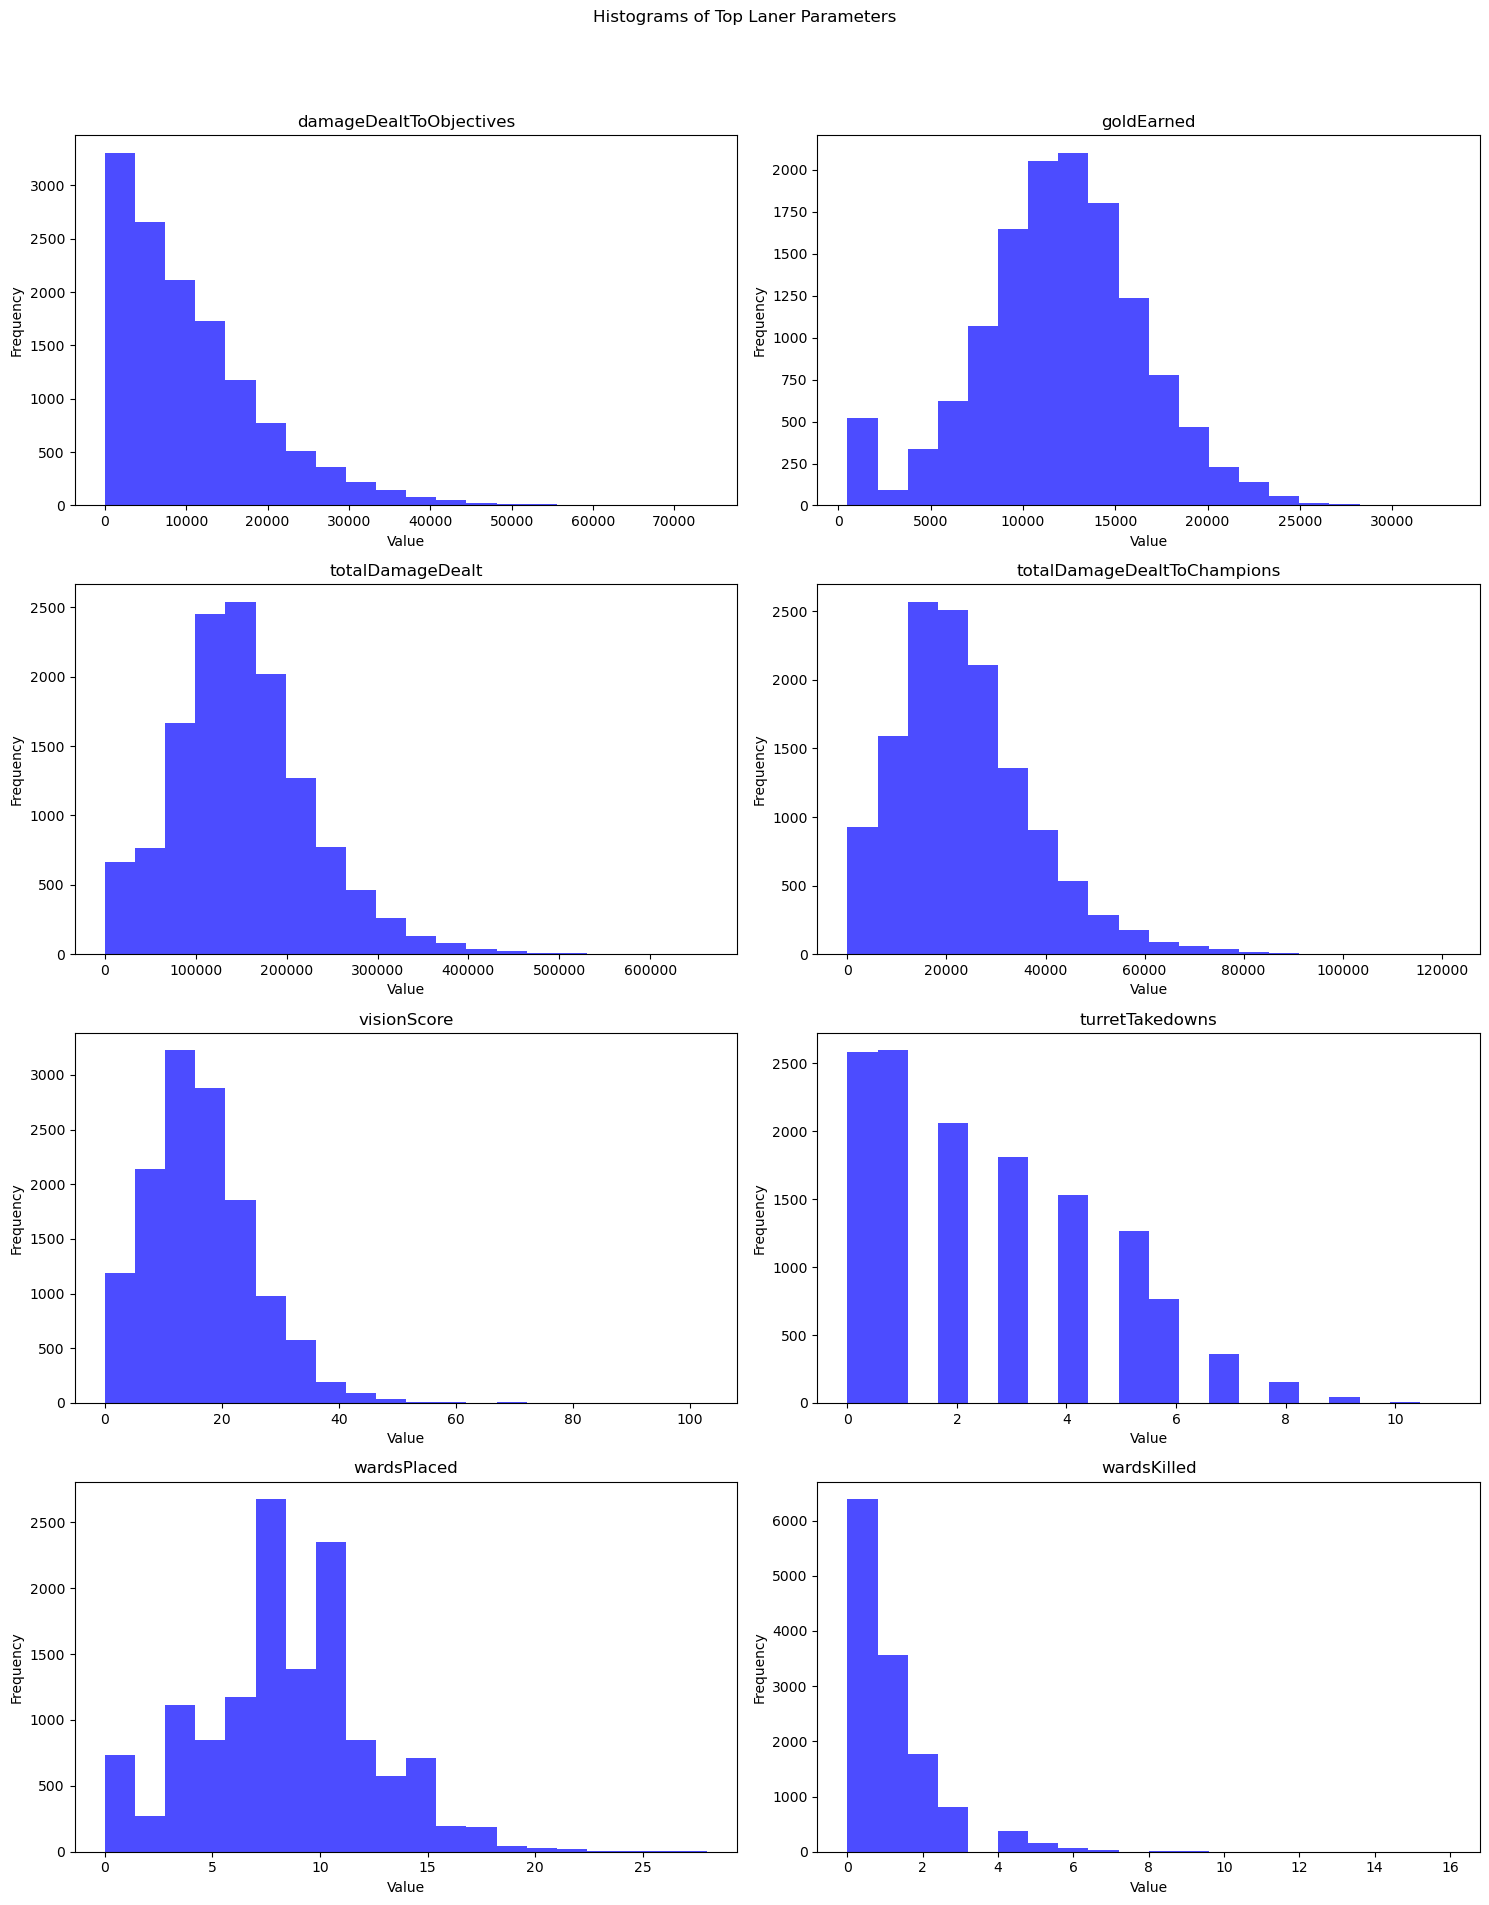

In [68]:
def plotHistograms(topLanersData):
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # Adjust the grid size based on the number of parameters
    fig.suptitle('Histograms of Top Laner Parameters')

    # Flatten the array of axes for easy indexing
    axs = axs.flatten()

    # List of parameters to plot
    parameters = [
        'damageDealtToObjectives', 'goldEarned', 'totalDamageDealt', 
        'totalDamageDealtToChampions', 'visionScore', 'turretTakedowns', 
        'wardsPlaced', 'wardsKilled'
    ]

    # Iterate over parameters and plot each histogram
    for i, param in enumerate(parameters):
        values = [laner[param] for laner in topLanersData if param in laner]  # Extract values for each parameter
        axs[i].hist(values, bins=20, alpha=0.7, color='blue')  # Adjust bins as needed
        axs[i].set_title(param)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plots
    plt.show()

# Assuming topLanersData is already defined and filled with your top laner data
# Call the function with your data
plotHistograms(topLanersData)

In [81]:
parameters = [
    [laner['damageDealtToObjectives'] for laner in topLanersData],
    [laner['goldEarned'] for laner in topLanersData],
    [laner['totalDamageDealt'] for laner in topLanersData],
    [laner['totalDamageDealtToChampions'] for laner in topLanersData],
    [laner['visionScore'] for laner in topLanersData],
    [laner['turretTakedowns'] for laner in topLanersData],
    [laner['wardsPlaced'] for laner in topLanersData],
    [laner['wardsKilled'] for laner in topLanersData]
]
labels = ['DamageDealtToObjectives', 'GoldEarned', 'TotalDamageDealt',
          'TotalDamageDealtToChampions', 'VisionScore', 'TurretTakedowns',
          'WardsPlaced', 'WardsKilled']

# Create a box plot for each parameter
for i, param in enumerate(parameters):
    fig = go.Figure()
    fig.add_trace(go.Box(y=param, name=labels[i]))
    
    # Customize the layout
    fig.update_layout(
        title=f'Boxplot of {labels[i]}',
        yaxis_title='Value',
        xaxis_title='Parameter',
        showlegend=False
    )
    
    fig.show()